# Расчёт длительности А/B теста + продвинутые топики

## Факторы влияющие на длительность теста
1. Cтатистические 
- Размер выбора (Effect size, ошибка 1 рода, ошибка 2 рода)
- Дисперсия
2. Продуктовые
- Сезонность (недельная/месячная../)
- Метрика (тип метрики и окно закрытия метрики)


## Рассчитываем выборку для проведения теста
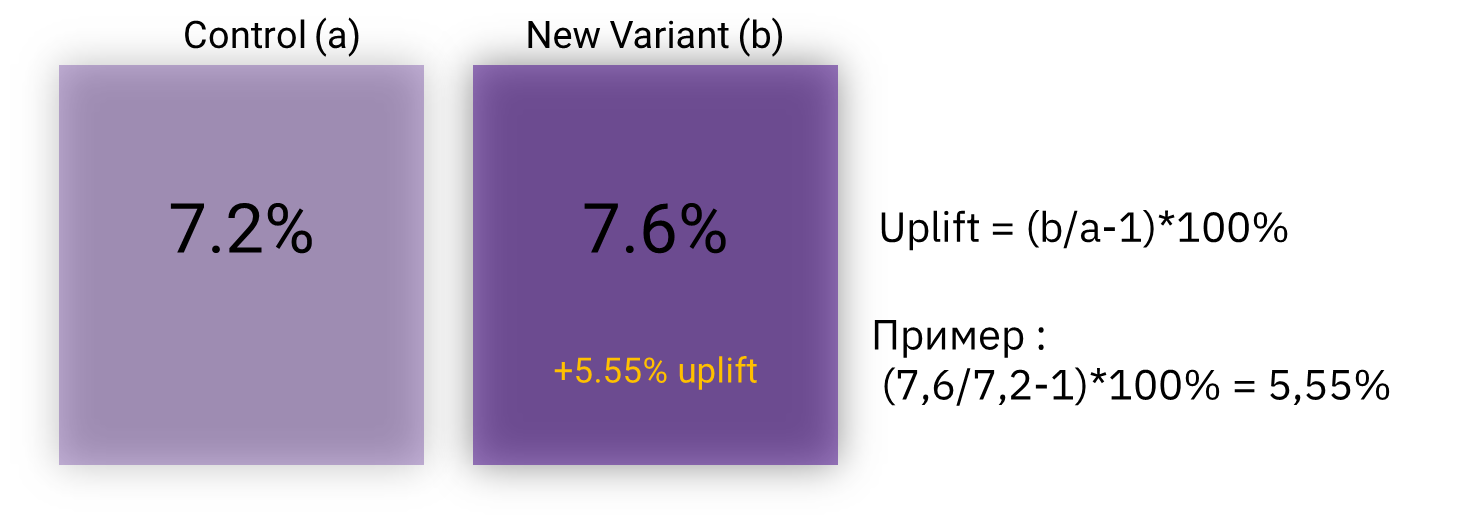

[Калькулятор выборки](https://www.evanmiller.org/ab-testing/sample-size.html)
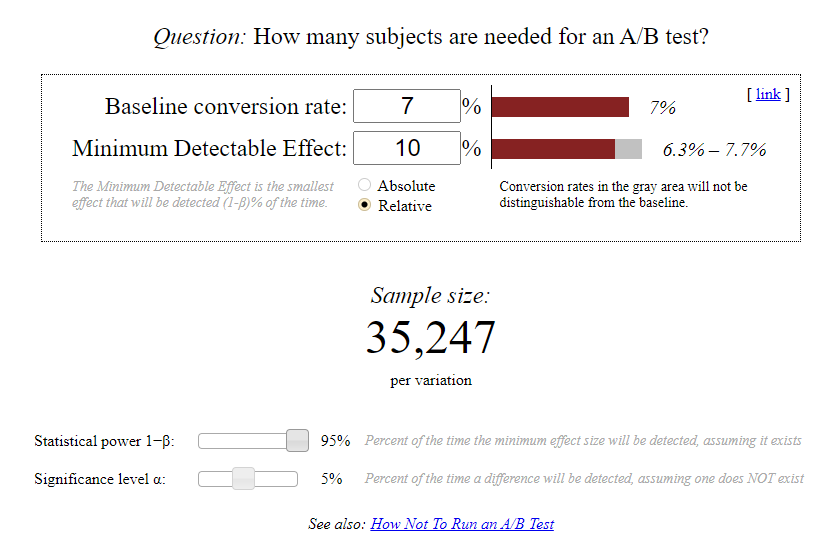

**Statistical power 1−β = Мощность** — процент случаев, в которых обнаруживается минимальный размер эффекта, при условии, что он существует. 
>Обычно 80% - это оптимальная статистическая мощность. 

**Significance level α** -  Процент случаев, когда разница будет обнаружена, если предположить, что она не существует


Сколько в день наш сайт посещает посетителей (aDAU)?
- ~ 6 600 пользователей

Сколько в день наш сайт посещает новых посетителей (aDNU)?
- ~ 4 300  новых пользователей

**Контрольный** - 35 247 пользователей

**Тестовый** - 35 247 пользователей

**Всего** - 70 494 пользователей

70 494 / 6 600 ~ 11 дней должен длится тест, если мы его реализуем на всех пользователях


### Определение размера выборки для средних непрерывных величин

Допустим, avg. daily timespent per user нынешней версии продукта равен 20 минут .

SD (стандартное отклонение) для этой метрики равно 45 минут (SD_pooled, считается из SD_1 & SD_2 - Ст.Откл. в 2 группах):
$$SD_{pooled}=\sqrt{\frac{{SD_1}^2 + {SD_2}^2}{2}}$$


Ожидаем, что avg. daily timespent per user в новой версии продукта будет = 23 минуты.

Хотим рассчитать размер выборки для этого теста:

[Калькулятор для непрерывных метрик](http://statulator.com/SampleSize/ss2M.html)
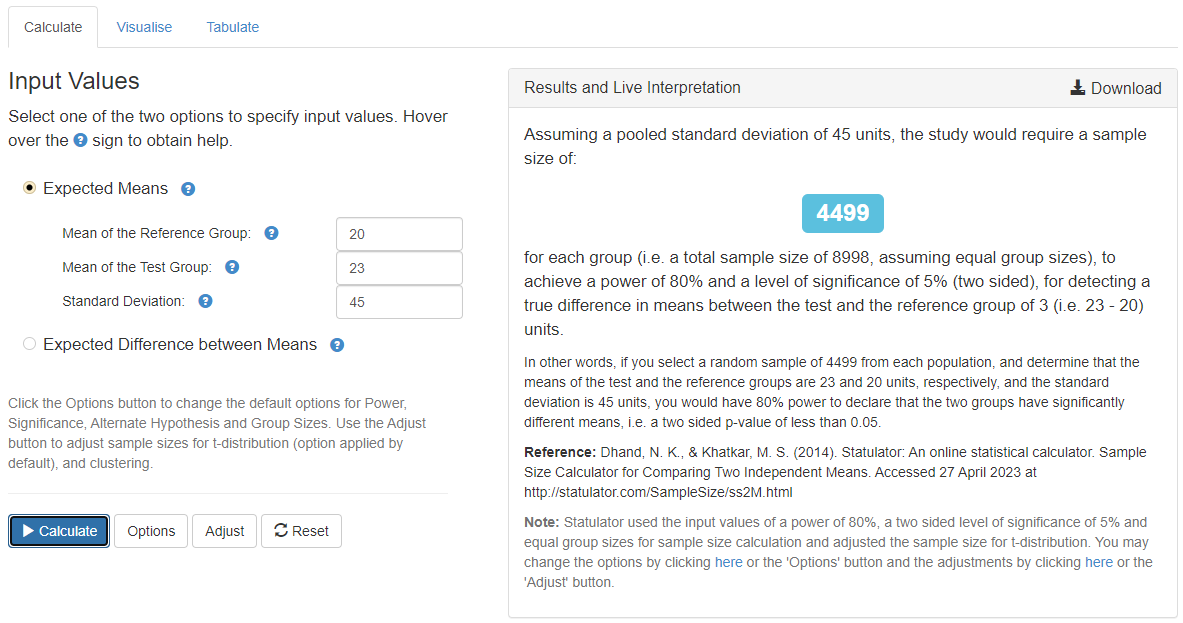

### Проверка на нормальность
Широко применяемыми методами проверки на  нормальность являются:
1. **Графические методы:** Оценка данных с использованием гистограммы и Quantile-Quantile-plot	
2. **Cтатистические методы:** Критерии для проверка нормальности распределения (критерии Шапиро-Уилка при n < 5000  и Колмогорова-Смирнова для выборок любого размера)

#### Тест Шапиро-Уилка 
Тест Шапиро-Уилка применяется  для выборки состоящей из менее чем 5000 наблюдений. 

- H0: x взята из генеральной совокупности с нормальным распределением. 
- H1: x взята из генеральной совокупности с другим распределением.

Тест Шапиро-Уилка является одним наиболее мощных  критериев для  проверки нормальности.

Принятие решения:

При р > alpha можно заключить, что анализируемое распределение не отличается от нормального.

#### тест Колмагорова-Смирнова 
Тест Колмагорова-Смирнова применяется  для выборок любого размера
- H0: x взята из генеральной совокупности с нормальным распределением. 
- H1: x взята из генеральной совокупности с другим распределением.

Тест Колмагорова-Смирнова также можно использовать для проверки любого другого распределения.

Принятие решения:

При р > alpha можно заключить, что анализируемое распределение не отличается от нормального.

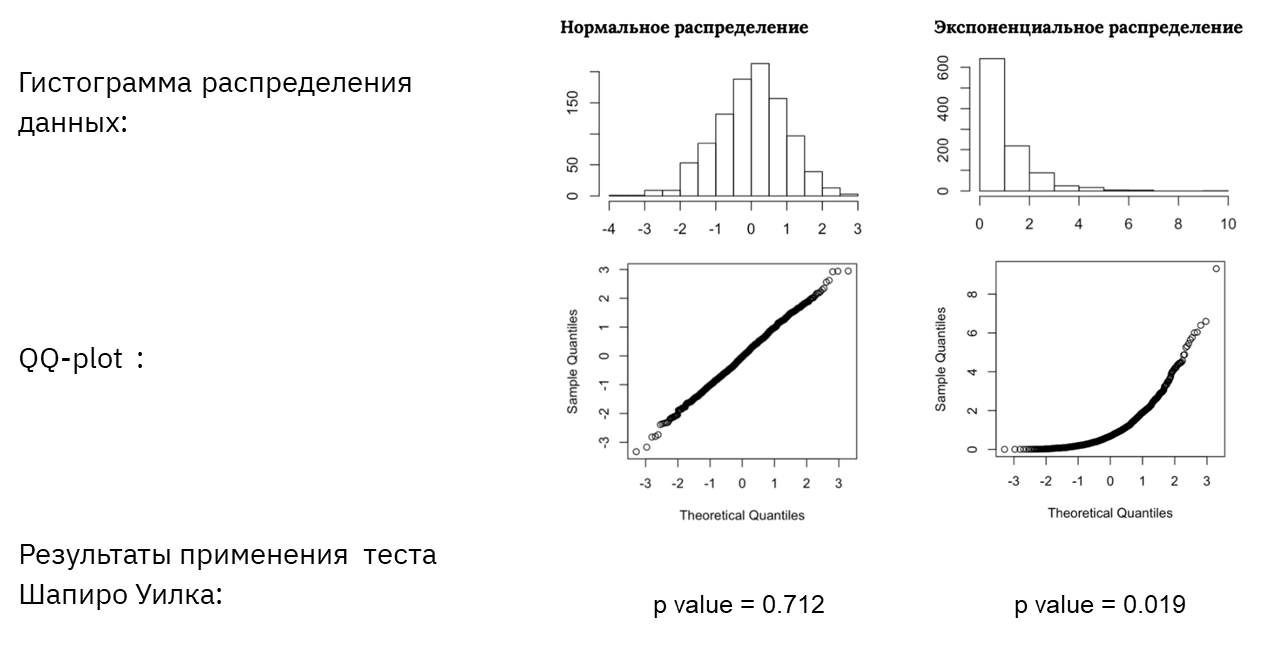

## Множественные сравнения
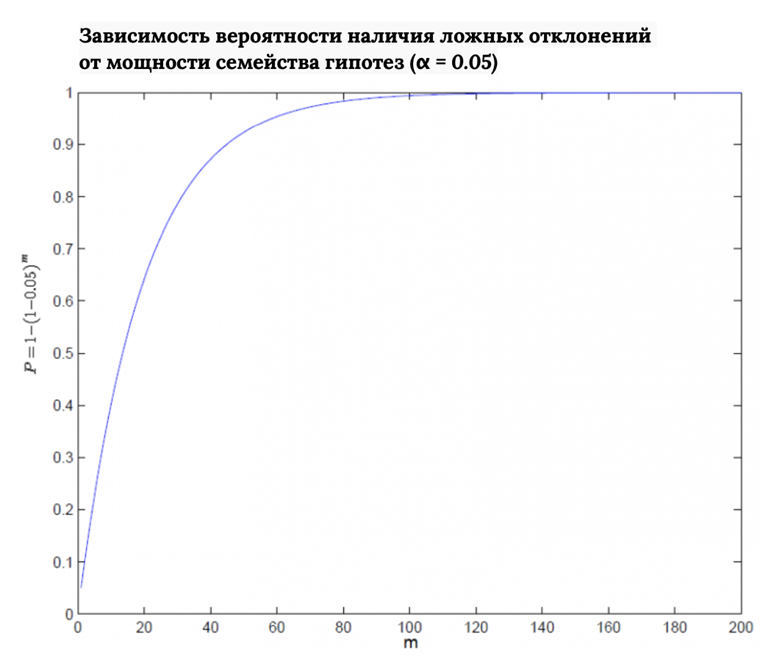

Если юзеры разбивается более чем на две подгруппы, вероятность получить ошибку первого рода при эксперименте нарастает экспоненциально:
$$1-{(1-α)}^m$$
, где m – количество сравнений. 

В случае, например, A/B/C теста у нас 3 попарных сравнения: A/B, A/C, B/C. 

Это означает, что при уровне значимости 95%, альфа будет: $1- {(1-0.05 )}^3 = 0.1426$


Исходя из возможных исходов теста существует два важных понятия ошибок, которые контролируются при множественном тестировании: 
**FWER** и **FDR**.

- **FWER (Family-Wise Error Rate)** представляет собой вероятность получить по крайней мере одну ошибку первого рода и определяется формулой: $FWER=p (V\geq1)$
					
FWER (обычно FWER < 0.05): строгий контроль за вероятностью ошибок первого рода.

### Поправка Бонферони
Один из самых простых и при этом жестких способов корректировки.  При этом падает мощность теста.

Зная число попарных сравнений, можно вычислить скорректированный уровень $\alpha$ и использовать его при оценке в статистических критериях.

Эта одношаговая процедура позволяет снизить вероятность ложноположительного результата эксперимента. Суть метода — принять альтернативную гипотезу, если: $p \leq \frac{\alpha}{n}$


**Пример:**
Запустили эксперимент с 5 вариантами и применили статистический критерий.

Итого: 10 попарных проверок (Каждую из 5 проверяем со всеми другими (5-1) и делим на 2, чтобы убрать задвоения): $$\frac{5 \cdot (5 - 1)}{2} = 10$$

$\alpha = 5%$

Alpha после применения поправки будет: $$\frac{0.05}{10} = 0.005 = 0.5\%$$
и уже с ним мы будем сравнивать p - value вместо  изначального.

## Бутстрап

### Предпосылки использования
- Непараметрические критерии, такие как критерий  Манна-Уитни, позволяют понять стат. значимо или нет различаются данные, но при этом не отвечают на вопрос, где именно возникает разница.
- Когда другие тесты не работают
- Когда ничего не знаем о распределении
- Когда хотим оценить сложный параметр

**Бутстрап** - случайный ресемплинг с возвращением, относящийся к семейству методов Монте-Карло.

- Задаем n - размер одной выборки
- Задаем i - кол-во выборок 
- Берем выборки i раз c возвращением n элементов, считая каждый раз метрики

Для A/B теста мы считаем разность метрик между сплитом A и B - и так как обычно A-контроль, а B - эксперимент, то улучшением является отрицательное значение разности, означающее, что на сплите B выше значения метрики.

Из всей выборки производится M сэмплирований (обычно берется 1000 - 10 000 семплов) по N юзеров, и по каждому сэмплу рассчитывается искомая величина - например, разность кликов между сплитом A/B.

Считаем доверительный интервал для разницы метрик в двух группах (обычно 95 % или 99%).

Далее проверяем если доверительный интервал для разницы не включает 0, то разница стат.значима, иначе нет.

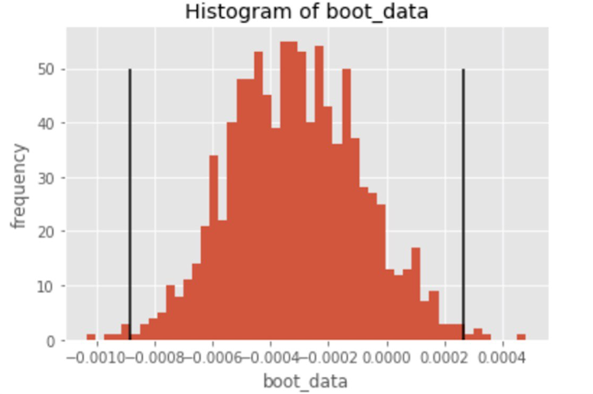

**Плюсы:**
- Позволяет решать очень широкий спектр задач
- Интуитивно понятный

**Нюансы:**
- Параметрические тесты более мощные
- Требует много вычислительных ресурсов и из-за этого может медленно работать на больших выборках


## Практическое задание 1:
Мы хотим провести АБ-тест баннеров. Нынешняя конверсия в клик на баннер (CTR) равна 1.5%. 

Мы предполагаем, что с новыми баннерами CTR вырастет до 1.7%. Определите, сколько юзеров нам нужно отправить на каждую версию с уровнем доверия 95%

In [1]:
ctr1a = 0.015
ctr1b = 0.017

ctr1b/ctr1a - 1

0.13333333333333353

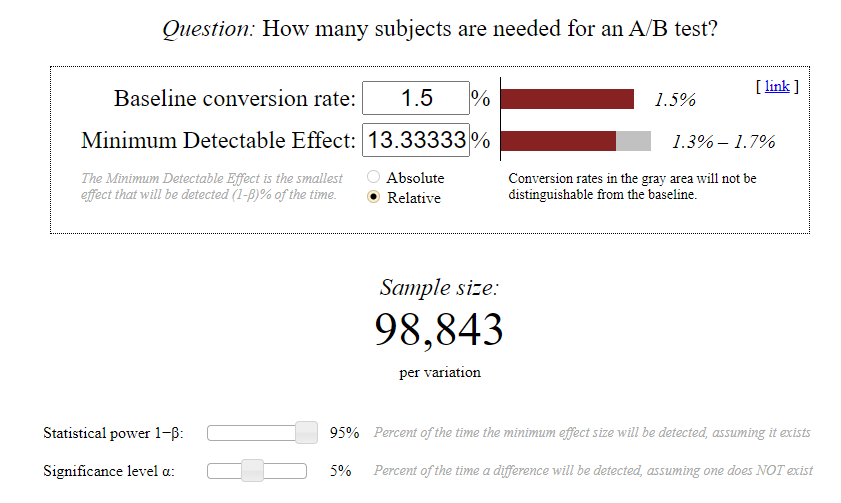

In [8]:
print('Total sample needed: {:,} users.'.format(98843*2).replace(',', ' '))

Total sample needed: 197 686 users.


## Практическое задание 2:
Мы хотим провести АБ-тест формы подтверждения заказа. Нынешняя конверсия в заказ равна 3%. Мы предполагаем, что конверсия вырастет на 0,1%. Определите, сколько юзеров нам нужно отправить на каждую версию с уровнем доверия 99% и уровнем мощности 90%


In [10]:
conv2a = 0.03
conv2b = 0.031

conv2b/conv2a - 1

0.03333333333333344

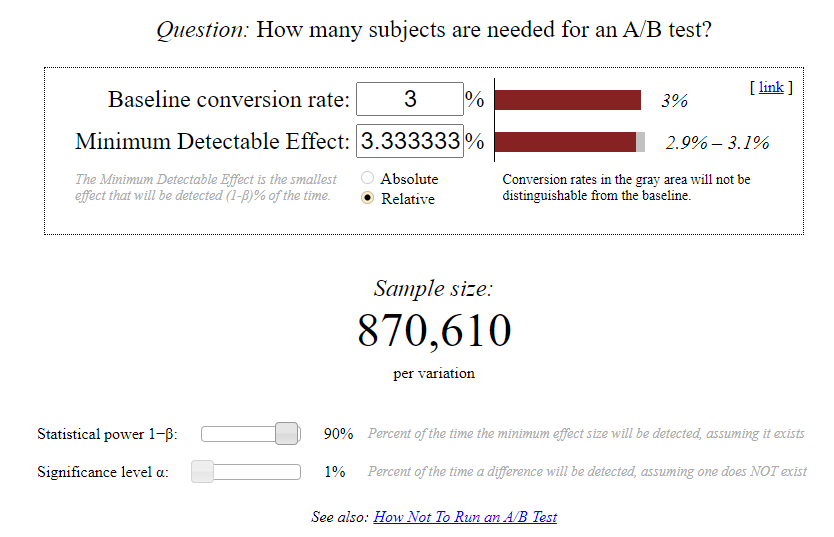

In [11]:
print('Total sample needed: {:,} users.'.format(870610*2).replace(',', ' '))

Total sample needed: 1 741 220 users.


## Практическое задание 3:

Дизайнер предложил добавить рекомендательную систему на этапе формирования корзины. Нынешний средний чек равен 2167 рублей, а стандартная ошибка (SD) равна 69. 

Мы предполагаем, что в новой версии средний чек вырастет и составит 2180. Определите, сколько юзеров нам нужно отправить на каждую версию с уровнем доверия 95%.

$$SD_{pooled}=\sqrt{\frac{{SD_1}^2 + {SD_2}^2}{2}}$$


In [12]:
import math

In [13]:
sd1 = 69
sd2 = sd1
sd_p = math.sqrt((sd1**2 + sd2**2)/2)
sd_p

69.0

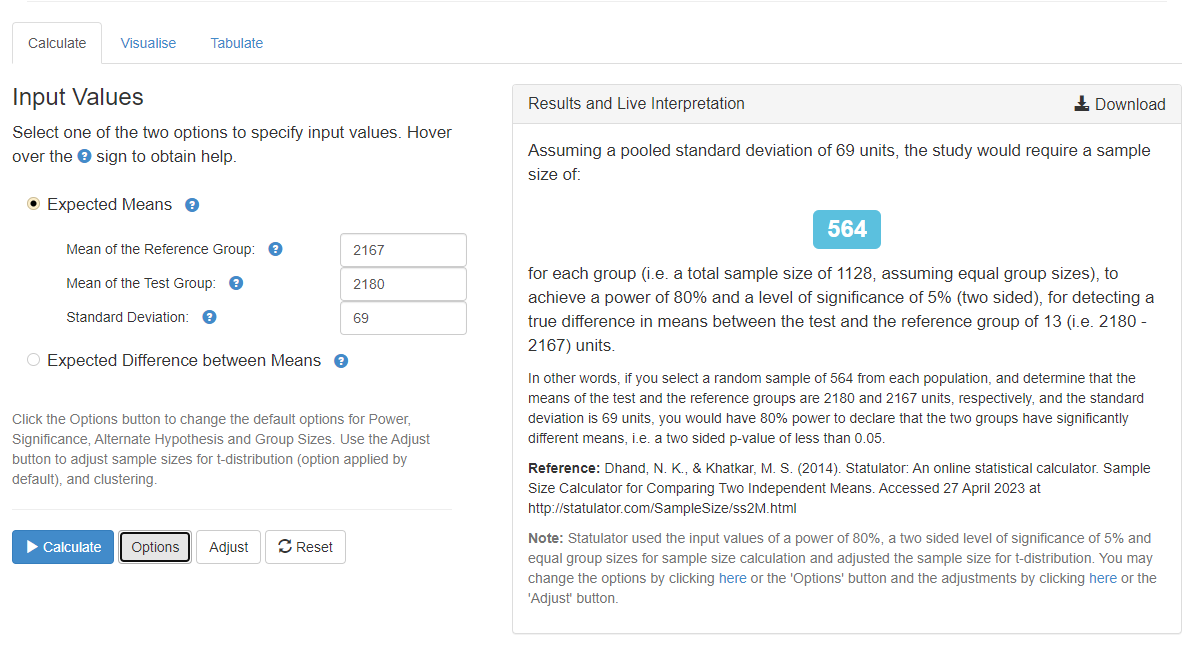

In [15]:
print('Each of 2 versions requires: {:,} users.'.format(564).replace(',', ' '))

Each of 2 versions requires: 564 users.


## Практическое задание 4:

Вы решили сравнить метрику "деньги на юзера" в двух группах. Размер выборки - 1000 элементов в каждой группе.

Для проверки нормальности распределения на выборке в 1000 наблюдений применили критерий Шапиро-Уилка и получили p-value, равный 0.00002. Если alpha = 5% то какой бы вывод мы могли сделать в данном случае?

В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше всего подойдёт и почему?

#### Ответ:
Совокупность, скорее всего, не имеет нормального распределения.

Распределение не нормальное, групп всего 2. Предлагается использовать критерий Манна-Уитни.

Также можно использовать Бутстреп.

## Практическое задание 5:
Сравниваем метрику конверсия в покупку. Размер выборки - 10000 элементов в каждой группе . Какой(ие) статистический(ие) критерий(ие) тут лучше всего подойдёт(ут) и почему ?

**Ответ:**
Неизвестно распределение. В данной ситуации рекомендовано использовать Бутстрап.